In [1]:
from keras.datasets.fashion_mnist import load_data
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


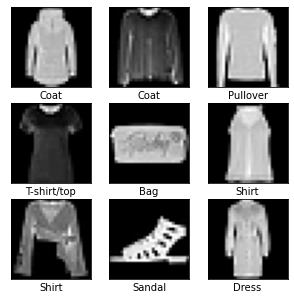

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


sample_size = 9

# 확인용 이미지 랜덤 선택
random_idx = np.random.randint(60000, size= sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[idx], cmap='gray')
  plt.xlabel(class_names[y_train[idx]])

plt.show()


In [4]:
# 데이터 확인
x_train.min(), x_train.max()

(0, 255)

In [5]:
# 데이터 값 전처리 (0~1)
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [7]:
# 레이블 값 확인
y_train.min(),y_train.max()


(0, 9)

In [8]:
# 레이블 값 원 핫 인코딩
from keras.utils import to_categorical

In [9]:
y_train = to_categorical(y_train)
t_test = to_categorical(y_test)

In [10]:
y_train.min(), y_train.max()

(0.0, 1.0)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size= 0.3, random_state=777)

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [15]:
#모델 생성

first_model = Sequential()

first_model.add(Flatten(input_shape=(28,28)))
# 데이터를 일차원으로 펼쳐주는 함수
first_model.add(Dense(64,activation='relu'))
# 완전연결층
first_model.add(Dense(32,activation='relu'))

first_model.add(Dense(10,activation = 'softmax'))
# 

In [16]:
# 모델 설정

first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [17]:
# 모델 확인

first_model.summary()
# 64 * 32 + 32 = 2080

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 모델 학습

first_history = first_model.fit(x_train,
                                y_train,
                                epochs = 30,
                                batch_size = 128,
                                validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 6s 8ms/step - loss: 0.7165 - acc: 0.7595 - val_loss: 0.4709 - val_acc: 0.8352
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4409 - acc: 0.8440 - val_loss: 0.4113 - val_acc: 0.8580
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3986 - acc: 0.8579 - val_loss: 0.3909 - val_acc: 0.8625
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3752 - acc: 0.8652 - val_loss: 0.3837 - val_acc: 0.8639
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3566 - acc: 0.8724 - val_loss: 0.3813 - val_acc: 0.8654
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3439 - acc: 0.8761 - val_loss: 0.3531 - val_acc: 0.8754
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3265 - acc: 0.8815 - val_loss: 0.3630 - val_acc: 0.8737
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [19]:
# 비교를 위한 두번째 모델 생성

second_model = Sequential()
second_model.add(Flatten(input_shape=(28,28)))
# 데이터를 일차원으로 펼쳐주는 함수
second_model.add(Dense(128,activation='relu'))
# 완전연결층
second_model.add(Dense(64,activation='relu'))
second_model.add(Dense(32,activation='relu'))

second_model.add(Dense(10,activation = 'softmax'))

second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

second_history = second_model.fit(x_train,
                                y_train,
                                epochs = 30,
                                batch_size = 128,
                                validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 6ms/step - loss: 0.6389 - acc: 0.7798 - val_loss: 0.4658 - val_acc: 0.8356
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4239 - acc: 0.8493 - val_loss: 0.4452 - val_acc: 0.8358
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3762 - acc: 0.8647 - val_loss: 0.3759 - val_acc: 0.8644
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3455 - acc: 0.8737 - val_loss: 0.3736 - val_acc: 0.8625
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3283 - acc: 0.8799 - val_loss: 0.3808 - val_acc: 0.8614
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3116 - acc: 0.8851 - val_loss: 0.3433 - val_acc: 0.8778
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2967 - acc: 0.8894 - val_loss: 0.3264 - val_acc: 0.8814
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [20]:
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


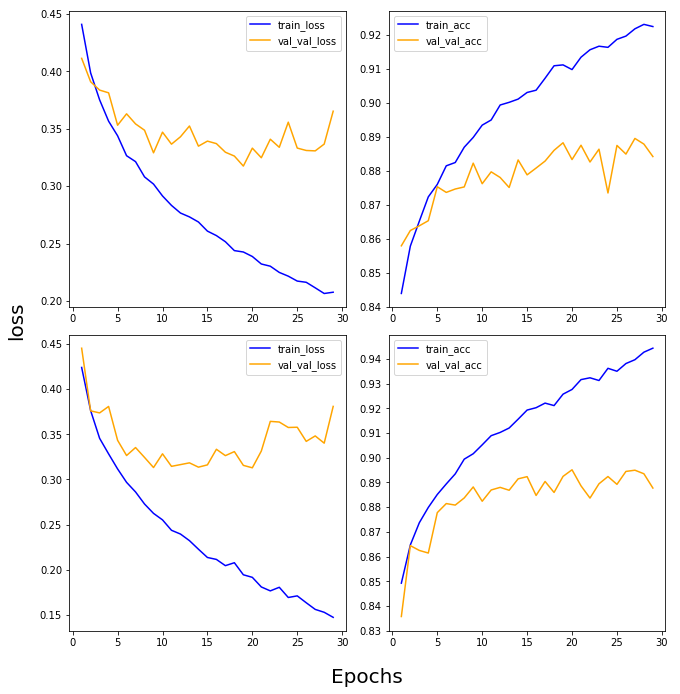

In [21]:
# 모델의 epochs 에 따른  loss와 acc

def draw_loss_acc(history1, history2, epochs):
  his_dict_1 = history1.history
  his_dict_2 = history2.history
  keys = list(his_dict_1.keys())

  epochs = range(1, epochs)
  fig = plt.figure(figsize = (10,10))
  ax = fig.add_subplot(1,1,1)
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.tick_params(labelcolor='w',top=False, bottom=False, left=False, right = False)

  for i in range(len(his_dict_1)):
    temp_ax = fig.add_subplot(2,2,i+1)
    temp = keys[i%2]
    val_temp = keys[(i+2)%2 + 2]

    temp_history = his_dict_1 if i < 2 else his_dict_2
    temp_ax.plot(epochs, temp_history[temp][1:],color='blue', label='train_' + temp)
    temp_ax.plot(epochs, temp_history[val_temp][1:],color='orange', label='val_' + val_temp)
    if(i == 1 or i == 3):
      start,end = temp_ax.get_ylim()
      temp_ax.yaxis.set_ticks(np.arange(np.round(start,2), end, 0.01))

    temp_ax.legend()
  
  ax.set_ylabel('loss', size = 20 , labelpad = 20)
  ax.set_xlabel('Epochs',size=20, labelpad=20)

  plt.tight_layout()
  plt.show()


draw_loss_acc(first_history,second_history,30)



In [22]:
#val_loss??
# 

#1 과적합
# 레이어 추가 후, 변동성이 더 심해짐

# 모델이 깊어질 수록 학습이 잘 되는 것이 아니라, 데이터에 맞는 깊이가 필요하다.
# 적절한 깊이를 설정해야 한다.
# 검증은 eval, 예측은 predict

In [23]:
from PIL import Image
import numpy as np

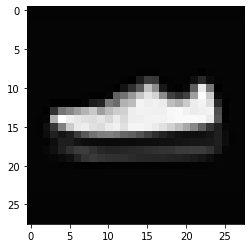

In [24]:
# 임의 사진 예측

img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/04_fashion_mnist_img/img01.jpg')
img = img.convert('L')
img = img.resize((28,28))

img = np.array(img)
img = (255-img)/255

plt.imshow(img,cmap = 'gray')
plt.show()


In [25]:
img.shape

(28, 28)

In [26]:
# result = first_model.predict(img) 
# 에러 Model was constructed with shape (None, 28, 28) for input KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='flatten_input'), name='flatten_input', description="created by layer 'flatten_input'"), but it was called on an input with incompatible shape (None, 28).


In [27]:
img.shape,x_train.shape

((28, 28), (42000, 28, 28))

In [28]:
result = first_model.predict(img.reshape(-1,28,28) )

1/1 [==============================] - 0s 85ms/step


In [29]:
img.reshape(-1,28,28).shape

(1, 28, 28)

In [30]:
result.shape
# (1, 10) 한 개, 예측 10(각 확률 값값)

(1, 10)

In [31]:
np.round(result,2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.95, 0.  , 0.05, 0.  , 0.  ]],
      dtype=float32)

In [32]:
np.argmax(np.round(result,2))

5

In [33]:
class_names[np.argmax(np.round(result,2))]

'Sandal'